# Multiple Schemas

In [1]:
%%capture --no-stderr
%pip install --quiet -U langgraph

## Private State and Overall State


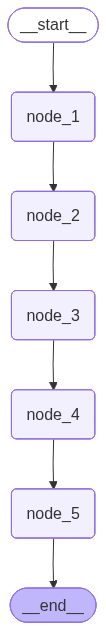

In [8]:
from typing_extensions import TypedDict
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class OverallState(TypedDict):
    foo: int

class PrivateState(TypedDict):
    baz: int

def node_1(state: OverallState) -> PrivateState:
    print("---Node 1---")
    return {"baz": state['foo'] * 10}

def node_2(state: PrivateState) -> PrivateState:
    print("---Node 2---")
    return {"baz": state['baz'] * 10}

def node_3(state: PrivateState) -> PrivateState:
    print("---Node 3---")
    return {"baz": state['baz'] / 10}

def node_4(state: PrivateState) -> PrivateState:
    print("---Node 4---")
    return {"baz": state['baz'] / 5}

def node_5(state: PrivateState) -> OverallState:
    print("---Node 5---")
    return {"foo": state['baz'] + 10}

# Build graph
builder = StateGraph(OverallState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)
builder.add_node("node_5", node_5)

# Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", "node_3")
builder.add_edge("node_3", "node_4")
builder.add_edge("node_4", "node_5")
builder.add_edge("node_5", END)

# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
graph.invoke({"foo" : 1})

---Node 1---
---Node 2---
---Node 3---
---Node 4---
---Node 5---


{'foo': 12.0}

## Input / Output Schema


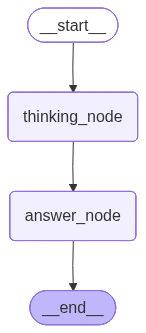

In [16]:
class OverallState(TypedDict):
    question: str
    answer: str
    notes: str

def thinking_node(state: OverallState):
    return {"answer": "hiii how are you", "notes": "... arnav entered a message"}

def answer_node(state: OverallState):
    return {"answer": "hiii how are you"}

graph = StateGraph(OverallState)
graph.add_node("answer_node", answer_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "answer_node")
graph.add_edge("answer_node", END)

graph = graph.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
graph.invoke({"question":"helloo"})

{'question': 'helloo',
 'answer': 'hiii how are you',
 'notes': '... arnav entered a message'}

Now, let's use a specific `input` and `output` schema with our graph.



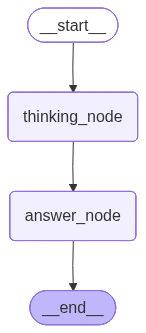

{'answer': 'hiii how are you'}

In [19]:
class InputState(TypedDict):
    question: str

class OutputState(TypedDict):
    answer: str

class OverallState(TypedDict):
    question: str
    answer: str
    notes: str

def thinking_node(state: InputState):
    return {"answer": "hiii how are you", "notes": "arnav entered a message"}

def answer_node(state: OverallState) -> OutputState:
    return {"answer": "hiii how are you"}

graph = StateGraph(OverallState, input_schema=InputState, output_schema=OutputState)
graph.add_node("answer_node", answer_node)
graph.add_node("thinking_node", thinking_node)
graph.add_edge(START, "thinking_node")
graph.add_edge("thinking_node", "answer_node")
graph.add_edge("answer_node", END)

graph = graph.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"question":"hi"})